# Problème 5 : Polynômes et interpolation

Dans ce problème, nous allons d'abord créer une classe pour représenter et manipuler les polynômes, puis nous utiliserons cette classe pour programmer des méthodes d'interpolation polynomiale.

## A. Classe pour les polynômes

### A.1. Représentation des polynômes et premières méthodes

La classe pour les polynômes sera appelée `Poly`. Dans cette classe, un polynôme sera représenté par un attribut `coeff` contenant la liste de ses coefficients, du coefficient du terme constant jusqu'au coefficient du terme de plus haut degré. 

Par exemple, le polynôme $X^3-2X^2+3$ sera représenté par la liste `[3, 0, -2, 1]`.

Par convention, le polynôme nul sera représenté par la liste vide `[]`.

- Dans un premier temps, créer la classe `Poly` muni :
    * de la méthode de construction `__init__` ;
    * des méthodes d'affichage `__repr__` et `__str__`.

La méthode `__init__` prendra en paramètre une liste de coefficients qu'elle affectera à l'attribut `coeff` après l'avoir débarrassée des `0` finaux superflus.

Voilà quelques exemples que cette première version de la classe `Poly` doit pouvoir reproduire.

~~~py
>>> Poly([3, 0, -2, 1])
Poly([3, 0, -2, 1])

>>> Poly([3, 0, -2, 1, 0, 0])
Poly([3, 0, -2, 1])

>>> Poly([0])
Poly([])

>>> print(Poly([3, 0, -2, 1]))
1*x**3 - 2*x**2 + 3

>>> print(Poly([0, -1, -3]))
-3*x**2 - 1*x

>>> print(Poly([]))
0
~~~

In [1]:
class Poly :
    
    def __init__ (self, poly): 
        self.coeff = []
        if poly == [0] or poly == []:
            self.coeff = []
        else : 
            for elem in poly :
                self.coeff.append(elem)
            self.coeff = self.coeff[::-1]
            while self.coeff[0] == 0 :
                self.coeff.pop(0)
            self.coeff = self.coeff[::-1]
                
    def __repr__ (self):
        return "Poly(" + str(self.coeff) + ")"
    
    def __str__ (self):
        self.coeff = self.coeff[::-1]
        rep = ""
        if self.coeff == []:
            return "0"
        for _ in range(len(self.coeff)) :
            if _ == len(self.coeff) - 1 : # élément de degré = 0
                if _ < 0 :
                    rep += "- " + str(-self.coeff[_]) 
                elif _ > 0 :
                    rep += "+ " + str(self.coeff[_])
                    
            if _ == len(self.coeff) - 2 : # élément de degré = 1
                if _ < 0 :
                    rep += "- " + str(-self.coeff[_]) + "*x "
                elif _ > 0 :
                    rep += "+ " + str(self.coeff[_]) +  "*x "
            elif self.coeff[_] > 0 and _ != 0: #premier élément
                rep += "+ " + str(self.coeff[_]) + "*x**" + str(len(self.coeff) - _ - 1) + " " 
            elif self.coeff[_] > 0: # élément > 0
                rep += str(self.coeff[_]) + "*x**" + str(len(self.coeff) - _ - 1) + " " 
            elif self.coeff[_] < 0: # élément < 0
                rep += "- " + str(-self.coeff[_]) + "*x**" + str(len(self.coeff) - _ - 1) + " "
        return rep
    
    
    def degre(self):
        """
        >>> Poly([0]).degre()
        -1
        >>> Poly([0, 1, 2, 3, 4, 0, 0]).degre()
        4
        """
        if self.coeff == [] :
            return -1
        else :
            return len(self.coeff) - 1
    
    def derive(self):
        """
        >>> Poly([3, 0, -2, 1]).derive()
        Poly([0, -4, 3])
        """
        self.coeff = self.coeff[::-1]
        for _ in range(len(self.coeff)) :
            self.coeff[_] = self.coeff[_] * (len(self.coeff) - _ - 1)
        self.coeff = self.coeff[::-1]
        self.coeff.pop(0)
            
        return Poly(self.coeff)
    
    
    
    def eval(self, x):      
        lg = len(self.coeff)
        res = self.coeff[lg - 1]
        for i in range(lg - 2, -1, -1):
            res = res * x + self.coeff[i]
        return res

    
    def __add__(self, other):
        """
        >>> Poly([2, 1, -1]) + Poly([9, 5, -1])
        Poly([11, 6, -2])
        
        >>> Poly([2, 1, -1]) + Poly([0])
        Poly([2, 1, -1])
        """
        deg_s, deg_o = Poly(self.coeff).degre(), Poly(other.coeff).degre()
        deg_g = min(deg_s, deg_o) # dans le cas ou les 2 polynômes sont de tailles diifférentes
        
        if deg_g != -1 :
            res = []
            for _ in range(deg_g + 1) :
                res.append(self.coeff[_] + other.coeff[_])
            return Poly(res)
        
        if deg_g == deg_s: # si un des polynômes est nul, renvoie l'autre polynôme
            return Poly(other.coeff)
        return Poly(self.coeff)
    
    
    def __sub__(self, other):
        """
        >>> Poly([2, 1, -1]) - Poly([0, 4, 11])
        Poly([2, -3, -12])
        
        """
        
        deg_s, deg_o = Poly(self.coeff).degre(), Poly(other.coeff).degre()
        deg_g = min(deg_s, deg_o) # dans le cas ou les 2 polynômes sont de tailles diifférentes
        
        if deg_g != -1 :
            res = []
            for _ in range(deg_g + 1) :
                res.append(self.coeff[_] - other.coeff[_])
            return Poly(res)
        
        if deg_g == deg_s: # si un des polynômes est nul, renvoie l'autre polynôme
            return Poly(other.coeff)
        return Poly(self.coeff)
    
    
    def __neg__(self):
        """
        >>> -Poly([-2, -1, 1])
        Poly([2, 1, -1])
        """
        if len(self.coeff) != 1 :
            for _ in range(len(self.coeff)):
                self.coeff[_] = - self.coeff[_]

        return Poly(self.coeff)
        
    
    def __mul__(self, other):
        """
        >>> Poly([2, 1, -1]) * Poly([0, 2, 1])
        Poly([0, 4, 4, -1, -1])
        """
        if (self.coeff == []) or (other.coeff == []) :
            return Poly([0])
        lst = [0] * (len(self.coeff) + len(other.coeff))
        
        for _ in range(len(self.coeff)):
            for p in range(len(other.coeff)):
                lst[_ + p] += self.coeff[_] * other.coeff[p]
                
        return Poly(lst)

In [2]:
P = Poly([2, 1, -1])
Q = Poly([0, 2, 1])

In [3]:
print(Poly([0, 2, -4, 6, -8, 0, 0, 89]))

89*x**7 - 8*x**4 + 6*x**3 - 4*x**2 + 2*x + 0


In [4]:
P * Q

Poly([0, 4, 4, -1, -1])

In [5]:
P + Q

Poly([2, 3])

In [6]:
P - Q

Poly([2, -1, -2])

In [7]:
-Poly([-2, -1, 1])

Poly([2, 1, -1])

In [8]:
Poly([0, 1, 0, 0]).degre()

1

In [9]:
Poly([3, 0, -2, 1]).derive()

Poly([0, -4, 3])

- Compléter la classe `Poly` en y ajoutant les méthodes suivantes :
    - `degre`, qui renvoie le degré du polynôme (avec la convention que le degré du polynôme nul vaut -1) ;

    - `derive`, qui renvoie le polynôme dérivé du polynôme.

Voilà quelques illustrations du comportement attendu.

~~~py
>>> Poly([1, 0, -1]).degre()
2

>>> Poly([]).degre()
-1

>>> Poly([3, 0, -2, 1]).derive()
Poly([0, -4, 3])
~~~



### A.2. Evaluation d'un polynôme

On cherche à programmer une méthode `eval` qui évalue un polynôme en un point donné.

Une première implémentation, basée sur un algorithme naïf, est donnée ci-dessous.

```py
def eval(self, x):
    v = 0
    for k in range(len(self.coeff)):
         v += self.coeff[k] * x**k
    return v
```

Voilà quelques exemples d'utilisation de cette méthode `eval`.

```py
>>> Poly([3, 0, -2, 1]).eval(2)
3

>>> Poly([3, 0, -2, 1]).eval(-1)
0
```

- Si l'on considère que le nombre de multiplications effectuées par l'opération `x**k` est de l'ordre de $\log_2(k)$, déterminer la complexité (en nombre d'additions et de multiplications, en ne gardant que le terme dominant asymptotiquement) de la méthode `eval` donnée ci-dessus pour évaluer un polynôme de degré $n$ en un point donné.

Remarque : La complexité en $\log_2(k)$ pour l'opération `x**k` est la complexité obtenue lorsqu'on utilise l'algorithme d'exponentiation rapide.

Indication : Pour simplifier l'expression obtenue, on utilisera la formule de Stirling qui donne un équivalent asymptotique de $n!$.

*-- Entrer la réponse ici. --*

Il existe un algorithme plus efficace pour l'évaluation d'un polynôme : l'**algorithme de Horner**. Cet algorithme repose sur la réécriture suivante de la valeur en un point.

$$
\begin{aligned}
P(x) &= a_0 + a_1 x + \ldots + a_{n}x^n\\
 &= a_0 + x( a_1  + x(a_2 + x (\ldots + x(a_{n-1} + x a_{n})\ldots)))
\end{aligned}
$$

Ainsi, en posant $v_n = a_n$ puis en calculant successivement

$v_{n-1} = a_{n-1} + x v_n$,

$\ldots$,

$v_1 = a_1 + xv_2$,

$v_0 = a_0 +xv_1$, 

on récupère la valeur de $P(x)$ dans $v_0$.

* Ajouter une méthode `eval` dans la classe `Poly` qui implémente l'algorithme de Horner.

* Déterminer la complexité (en nombre d'additions et de multiplications, en ne gardant que le terme dominant asymptotiquement) de l'algorithme de Horner pour évaluer un polynôme de degré $n$ en un point donné.

*-- Entrer la réponse ici. --*

### A.3. Somme et produit de polynômes

* Soit $P$ un polynôme de degré $n$ et $Q$ un polynôme de degré $m$. Que peut-on dire du degré de $P+Q$ ? de $PQ$ ?

<span style = "color : blue;">
    $deg(P+Q) = max(deg(P), deg(Q))$
    
$def(PQ) = deg(P) + deg(Q)$
</span>


- Compléter la classe `Poly` en y ajoutant les méthodes spéciales `__add__`, `__neg__`, `__sub__` et `__mul__`. Voilà quelques illustrations du comportement attendu.

~~~py
>>> P = Poly([2, 1, -1])
>>> Q = Poly([0, 2, 1])
>>> P + Q
Poly([2, 3])

>>> P - Q
Poly([2, -1, -2])

>>> Poly([0, 1]) * P
Poly([0, 2, 1, -1])

>> P * Q
Poly([0, 4, 4, -1, -1])
~~~

Indication : Pour la multiplication d'un polynôme `P` de degré `n` et d'un polynôme `Q` de degré `m`, commencer par créer une liste de taille `n+m` remplie de `0`. Puis considérer le produit de chaque terme de `P` avec chaque terme de `Q` (à l'aide d'une double boucle) et modifier la liste en conséquence.

- Quelle est la complexité (en nombre d'additions) de la méthode `__add__` pour calculer la somme d'un polynôme de degré $n$ et d'un polynôme de degré $m$ ?

<span style = "color : blue;">
    complexité __add__ : $n * m$
</span>

- Quelle est la complexité (en nombre d'additions et de multiplications) de la méthode `__mul__` pour calculer le produit d'un polynôme de degré $n$ et d'un polynôme de degré $m$ ?

<span style = "color : blue;">
    complexité __mul__ : $n*m$
</span>

- Insérer des tests (*doctests*) dans les chaînes de documentation (*docstrings*) des différentes méthode de la classe `Poly`. Tester la classe `Poly` avec la commande `testmod` du module `doctest`.


In [10]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=8)

### A.4. Tracé d'une courbe polynomiale

- Ecrire une fonction `drawpoly` qui prend en paramètres un polynôme `P`, deux nombres flottants `x0` et `x1`, un entier `N`, et qui trace la représentation graphique de ce polynôme sur l'intervalle $[x_0,x_1]$ avec la commande `plot` du module `matplotlib.pyplot` en utilisant `N` points intermédiaires. On définira une valeur par défaut pour `N` égale à `100`.

In [11]:
from numpy import linspace
import matplotlib.pyplot as plt


def drawpoly(P, x0, x1, n = 100):
    x = linspace(x0, x1, n)
    y = [P.eval(var) for var in x]
    plt.plot(x, y)
    plt.show()
    
    

- En utilisant cette fonction `drawpoly`, tracer la représentation graphique du polynôme $ -2X^3 + X +1$ sur l'intervalle $[-1,1]$.

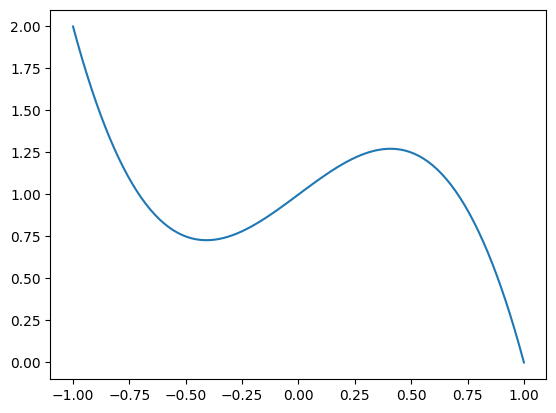

In [12]:
P = Poly([1, 1, 0, -2])
drawpoly(P, -1, 1)

### A.5. Une application : une suite de polynômes

On considère la suite de polynômes $(P_n)_{n\in\mathbb{N}}$ définis par la relation de récurrence

$$ P_{n+1}(X) = 2 X P_{n}(X) - P_{n-1}(X), $$

avec $P_0 = 1$ et $P_1 = X$.

- Ecrire un pogramme qui calcule les dix premiers polynômes de la suite et trace leurs courbes représentatives sur l'intervalle $[-1,1]$.

- Au vu de ces courbes, quelle conjecture peut-on faire sur le nombre et la localisation des racines réelles du polynôme $P_n$ pour $n$ donné ?

*-- Entrer la réponse ici. --*

## B. Interpolation

Soit $(x_0,y_0), (x_1,y_1), \ldots,(x_n,y_n)$ un ensemble de points tels que $x_0 < x_1 < \ldots < x_n$. 

Nous cherchons à construire une courbe **régulière** qui passe par ces points. Autrement dit, nous cherche à construire une fonction $f: [x_0,x_n] \rightarrow \mathbb{R}$ régulière telle que

$$f(x_0)=y_0, f(x_1)=y_1, \ldots,f(x_n)=y_n.$$

Puisqu'il s'agit de définir le chemin entre des points, on parle de courbes (et de fonctions) d'**interpolation**. Les courbes d'interpolation sont utilisées dans de nombreuses applications, notamment en **infographie**.

Il existe différentes techniques d'interpolation. Nous nous intéressons ici :

* à l'**interpolation de Lagrange**,

* aux **interpolations de Hermite** et plus particulièrement à l'**interpolation de Catmull-Rom**.

### B.1. Polynôme d'interpolation de Lagrange

Soit $(x_0,y_0), (x_1,y_1), \ldots,(x_n,y_n)$ un ensemble de points tels que $x_0 < x_1 < \ldots < x_n$. On appelle **polynôme d'interpolation de Lagrange** le polynôme $P$ de degré $\leq n$ tel que $P(x_0) = y_0, P(x_1)=y_1,\ldots, P(x_n)=y_n$.

### B.1.1 Existence et unicité du polynôme d'interpolation

Soit $(x_0,y_0), (x_1,y_1), \ldots,(x_n,y_n)$ un ensemble de points tels que $x_0 < x_1 < \ldots < x_n$. Soit $\varphi :\mathbb{R}_n[X] \rightarrow \mathbb{R}^{n+1}$ l'application définie par

$$
\varphi(P)=\left(P(x_0),P(x_{1}), \ldots, P(x_n))\right).
$$

On admet que l'application $\varphi$ est une application linéaire.

* Soit  $P \in \operatorname{Ker} \varphi$. En raisonnant sur le nombre de racines de $P$, montrer que $P$ est le poynôme nul.

*-- Entrer la réponse ici. --*

* En déduire que $\varphi$ est injective, puis, par un argument de dimension, que $\varphi$ est bijective.

*-- Entrer la réponse ici. --*

* En déduire que le polynôme d'interpolation de Lagrange passant par les points $(x_0,y_0), (x_1,y_1), \ldots,(x_n,y_n)$ existe et est unique.

*-- Entrer la réponse ici. --*

### B.1.2. Calcul des coefficients du polynôme d'interpolation

Une façon de calculer les coefficients du polynôme d'interpolation de Lagrange consiste à résoudre un système linéaire.

Soit $P$ le polynôme d'interpolation de Lagrange passant par les points $(x_0,y_0), (x_1,y_1), \ldots,(x_n,y_n)$.

Il s'agit d'un polynôme de degré $n$ donc il peut s'écrire :

$$
P(X) = a_0 +a_1 X + \ldots +a_n X^n.
$$

Par ailleurs, il vérifie :

$$
\left\{
\begin{array}{l}
P(x_0)=y_0 \\
P(x_1)=y_1\\
\ldots\\
P(x_n)=y_n
\end{array}
\right.
$$


* En déduire un système linéaire $n\times n$ sur les coefficients $a_0, a_1,\ldots, a_n$ du polynôme d'interpolation de Lagrange $P$.

*-- Ecrire la réponse ici. --*
$$
\left\{
\begin{array}{l}
??? = ??? \\
??? = ???\\
\ldots \\
??? = ???
\end{array}
\right.
$$

* Écrire ce système sous forme matricielle.

*-- Ecrire la réponse ici. --*
$$
\begin{pmatrix} 
? & ? &\ldots & ? \\
? & ? & \ldots & ? \\
 &  &  &  \\
 ? & ? & \ldots & ? \\
\end{pmatrix} 
\begin{pmatrix}
a_0 \\
a_1 \\
\\
a_n
\end{pmatrix}
= 
\begin{pmatrix}
? \\
? \\
\\
?
\end{pmatrix}
$$

Pour effectuer la résolution d'un système linéaire en Python, on propose d'utiliser la commande `linalg.solve` du paquet `numpy`. Voici un exemple d'utilisation de cette commande pour résoudre le système :
$$
\begin{pmatrix} 3 & 1 \\ 1 & 2 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} -1 \\ 2 \end{pmatrix}
$$

```py
>>> import numpy as np
>>> A = [[3, 1], [1, 2]]
>>> B = [-1, 2]
>>> np.linalg.solve(A, B)
array([-0.8,  1.4])
```

On notera que la solution renvoyée par cette commande n'est pas un objet de type `list` mais un objet de type `array` (un type spécifique à la bibliothèque `numpy`). En pratique, ici, cela ne change rien.

- Ecrire une fonction `poly_Lagrange` qui prend en paramètres une liste d'abscisses `x` et une liste d'ordonnées `y`,  et renvoie (sous forme d'un objet de la classe `Poly`) le polynôme d'interpolation de Lagrange passant par les points données par ces deux listes.

- A l'aide des fonctions `poly_Lagrange` et `drawpoly`, calculer puis tracer sur $[0,4]$ le polynôme d'interpolation de Lagrange $P$ passant par les points $(0, 1.5)$, $(1, 2)$, $(2.5, -1)$, $(4, 0)$.

### B.2. Polynôme d'interpolation de Hermite

Soit $(x_0,y_0)$, $(x_1,y_1)$ deux points tels que $x_0 < x_1$ et deux valeurs $d_0$ et $d_1$. On appelle **polynôme d'interpolation de Hermite** associé à ces points et ces valeurs le polynôme $P$ de degré $\leq 3$ tel que

$$
P(x_0)=y_0,\quad P'(x_0)=d_0,\quad P(x_{1})=y_{1}, \quad P'(x_{1})=d_{1}.
$$

### B.2.1. Existence et unicité du polynôme d'interpolation

A toutes fins utiles, on rappelle la définition des racines doubles d'un polynôme et leur principale propriété.

**Définition.** Soit $P$ un polynôme. On dit que $\alpha$ est une racine double de $P$ si $P(\alpha) = 0$ et $P'(\alpha)=0$.

**Proposition.** Soit $P$ un polynôme. Une valeur $\alpha$ est racine double de $P$ si et seulement si $(X-\alpha)^2$ divise le polynôme $P$ (autrement dit, si et seulement s'il existe un polynôme $Q$ tel que $P(X) = (X-\alpha)^2 Q(X)$).


Soit deux réels $x_0, x_1$ tels que $x_0 < x_1$. Soit $\varphi :\mathbb{R}_3[X] \rightarrow \mathbb{R}^4$ l'application définie par

$$
\varphi(P)=\left(P(x_0),P'(x_0),P(x_{1}),P'(x_{1})\right).
$$

On admet que l'application $\varphi$ est une application linéaire.

* Soit  $P \in \operatorname{Ker} \varphi$. 
    * Montrer que $P(X) = (X-x_0)^2 (X-x_1)^2 Q(X)$, où $Q$ est un polynôme. 
    * Rappeler le degré de $P$. 
    * En déduire que $Q$ est le polynôme nul et donc $P$ aussi.

*-- Entrer la réponse ici. --*

* En déduire que $\varphi$ est injective, puis, par un argument de dimension, que $\varphi$ est bijective.

*-- Entrer la réponse ici. --*

* En déduire que le polynôme d'interpolation de Hermite associé aux points $(x_0,y_0)$, $(x_1,y_1)$ et aux valeurs $d_0, d_1$ existe et est unique.

*-- Entrer la réponse ici. --*

### B.2.2. Calcul des coefficients du polynôme d'interpolation

Comme pour le polynôme d'interpolation de Lagrange, une façon de calculer le polynôme d'interpolation de Hermite consiste à résoudre un système linéaire (dont les inconnues sont les coefficients du polynôme).

Puisqu'il s'agit d'un polynôme de degré $\leq 3$, un polynôme d'interpolation de Hermite peut s'écrire :

$$ P(X) = a + b X + c X^2 + d X ^3.$$ 

Par ailleurs, il vérifie

$$
\left\{
\begin{array}{l}
P(x_0)=y_0 \\
P'(x_0)=d_0\\
P(x_{1})=y_{1}\\
P'(x_{1})=d_{1}
\end{array}
\right.
$$

* En déduire un système linéaire $4\times 4$ sur les coefficients $a, b, c, d$. Écrire ce système sous forme matricielle.

*-- Ecrire la réponse ici. --*
$$
\begin{pmatrix} 
? & ? & ?  & ? \\
? & ? & ?  & ? \\
? & ? & ?  & ? \\
? & ? & ?  & ? \\
\end{pmatrix} 
\begin{pmatrix}
a \\
b \\
c \\
d
\end{pmatrix}
= 
\begin{pmatrix}
? \\
? \\
? \\
?
\end{pmatrix}
$$


- Ecrire une fonction `poly_Hermite` qui prend en paramètres 6 valeurs `x0`, `x1`, `y0`, `y1`, `d0`, `d1`, et renvoie (sous forme d'un objet de la classe `Poly`) le polynôme d'interpolation de Hermite tel que

$$P(x_0)=y_0,\quad P'(x_0)=d_0,\quad P(x_{1})=y_{1}, \quad P'(x_{1})=d_{1}.$$

- A l'aide des fonctions `poly_Hermite` et `drawpoly`, calculer puis tracer sur $[0,2]$ le polynôme d'interpolation de Hermite $P$ tel que

$$P(0)=1,\quad P'(0)=0,\quad P(2)=0, \quad P'(2)=1.$$

### B.3. Courbes d'interpolation de Hermite et de Catmull-Rom


Soit $(x_0,y_0), (x_1,y_1), \ldots,(x_n,y_n)$ un ensemble de points tels que $x_0 < x_1 < \ldots < x_n$. 

Soit des valeurs $d_0, d_1, \ldots d_n$ (appelées pentes de raccord).

Pour tout $k\in\{0,\ldots,n-1\}$, on définit le polynôme d'interpolation de Hermite $P_k$ tel que

$$P_k(x_k)=y_k,\quad P'_k(x_k)=d_k,\quad P_k(x_{k+1})=y_{k+1}, \quad P'_k(x_{k+1})=d_{k+1}.$$

La **fonction d'interpolation de Hermite** associée aux points $(x_0,y_0), (x_1,y_1), \ldots,(x_n,y_n)$ et aux pentes $d_0, d_1 \ldots d_n$ est la fonction  $f: [x_0,x_n] \rightarrow \mathbb{R}$ telle que

$$
f(x) = \begin{cases}
P_0(x) &\text{si} \quad x \in [x_0,x_1],\\
P_1(x) &\text{si} \quad x \in ]x_1,x_2],\\
\ldots \\
P_{n-1}(x) &\text{si} \quad x \in ]x_{n-1},x_n]
\end{cases}
$$

Il est immédiat de constater que cette fonction est polynomiale par morceaux et que le raccord entre ces morceaux est $C^1$. En effet, par définition des polynômes
$P_k$ :

$$ P_k(x_{k+1}) = P_{k+1}(x_{k+1}) \quad \text{et} \quad P'_k(x_{k+1}) = P'_{k+1}(x_{k+1}).$$

Globalement cette fonction est donc de classe $C^1$.

* Ecrire une fonction `interpol_Hermite` qui calcule la fonction d'interpolation de Hermite. Cette fonction prendra en paramètres `x`, la liste des abscisses des points, `y`, la liste des ordonnées, et `d`, la liste des pentes. Cette fonction renverra la liste des polynômes formant la fonction d'interpolation.

- Calculer la fonction d'interpolation de Hermite passant par les points $(0,1)$, $(1,0.5)$, $(3,-2)$, $(5,2)$, $(6,4)$ et $(9,0)$ avec des pentes de raccord toutes égales à zéro.

La fonction d'interpolation de Catmull-Rom est une version particulière de la fonction d'interpolation de Hermite dans laquelle on prend les valeurs suivantes pour les pentes de raccord :

$\displaystyle d_0 = \frac{y_1-y_0}{x_1-x_0}$, $\displaystyle d_n=\frac{y_n-y_{n-1}}{x_n-x_{n-1}}$ et, pour tout $k\in\{1,\ldots,n-1\}$, $\displaystyle d_k = \frac{y_{k+1}-y_{k-1}}{x_{k+1}-x_{k-1}}$.


- Ecrire une fonction `interpol_CR` qui calcule la fonction d'interpolation de Catmull-Rom. Cette fonction prendra en paramètres `x`, la liste des abscisses des points, et `y`, la liste des ordonnées. Cette fonction renverra la liste des polynômes formant l'interpolation.

- Calculer la fonction d'interpolation de Catmull-Rom passant par les points $(0,1)$, $(1,0.5)$, $(3,-2)$, $(5,2)$, $(6,4)$ et $(9,0)$.

- Ecrire une fonction `drawinterpol` qui trace une interpolation polynomiale par morceaux. Cette fonction prendra en paramètres `x`, la liste des abscisses des points d'interpolation, et `interpol`, la liste des polynômes formant l'interpolation.

- Tracer la fonction d'interpolation de Hermite passant par les points $(0,1)$, $(1,0.5)$, $(3,-2)$, $(5,2)$, $(6,4)$ et $(9,0)$ avec des pentes de raccord toutes égales à zéro. Tracer la fonction d'interpolation de Catmull-Rom passant par ces mêmes points.

- Entre ces deux tracés, lequel vous semble avoir l'aspect le plus "naturel" ?

Le code suivant permet de tracer une ligne brisée de manière interactive : un clic gauche ajoute un point au tracé, un clic doit marque le point final du tracé.

<IPython.core.display.Javascript object>


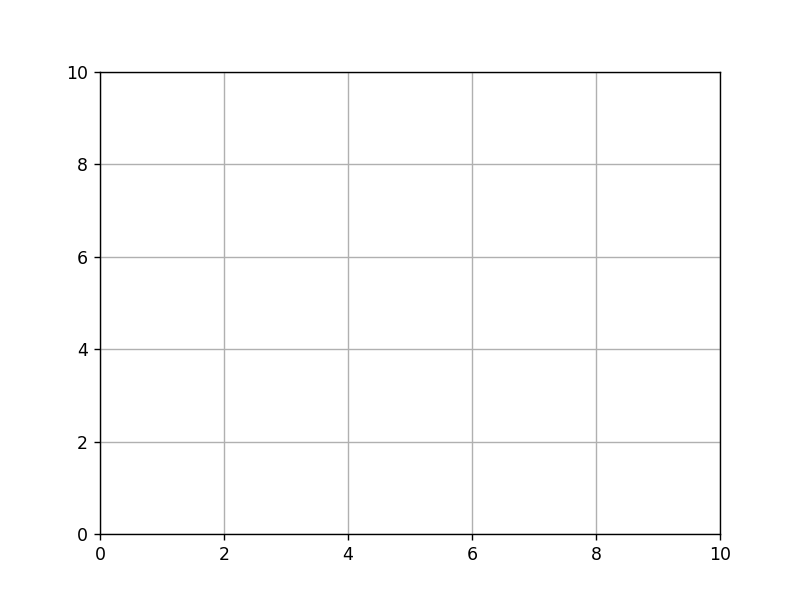

9

In [13]:
import matplotlib.pyplot as plt

def onclick(event):
    if event.button == 1: #clic gauche
        x0, y0 = event.xdata, event.ydata
        x.append(x0)  
        y.append(y0)
        plt.plot(x0, y0, 'b.') 
    elif event.button == 3: #clic droit
        x0, y0 = event.xdata, event.ydata
        x.append(x0)  
        y.append(y0)
        plt.plot(x0, y0, 'b.') 
        plt.plot(x, y, color="blue")
    else:
        pass

x, y = [], []

%matplotlib notebook 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.grid(True)   
fig.canvas.mpl_connect('button_press_event', onclick)

- En s'inspirant du code ci-dessus, écrire un code qui permet de tracer de manière interactive l'interpolation de Catmull-Rom.